In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Features engineering
## Input: transactions dataset (name: transactions 2018)
## Output: dataset with features for profiling normalized (name: data)

In [2]:
df=pd.read_csv("transactions2018.csv")
df.head()

,index,Account_No,DATE,TRANSACTION_DETAILS,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,year,month,day,type,AMOUNT
0,0,409000611074',2018-01-01,INDO GIBL Indiaforensic STL31121,14000.0,0.0,697823.0,2018,1,1,PAYEMENT,14000.0
1,1,409000611074',2018-01-01,INDO GIBL Indiaforensic STL30121,54250.0,0.0,643573.0,2018,1,1,DEBIT,54250.0
2,2,409000611074',2018-01-02,INDO GIBL Indiaforensic STL01011,147500.0,0.0,496073.0,2018,1,2,PAYEMENT,147500.0
3,3,409000611074',2018-01-03,FDRL/INTERNAL FUND TRANSFE,0.0,500000.0,996073.0,2018,1,3,TRANSFER,500000.0
4,4,409000611074',2018-01-03,INDO GIBL Indiaforensic STL02011,323500.0,0.0,672573.0,2018,1,3,PAYEMENT,323500.0


In [10]:
profiling_df=df.drop(["index","Account_No","TRANSACTION_DETAILS","WITHDRAWAL_AMT","DEPOSIT_AMT","year","type","month","day"], axis=1)

In [11]:
profiling_df["DATE"] = pd.to_datetime(profiling_df['DATE'],format='%Y-%m-%d')
profiling_df['month']=profiling_df['DATE'].dt.month 
profiling_df['day']=profiling_df['DATE'].dt.day
profiling_df['dayofweek']=profiling_df['DATE'].dt.dayofweek 
profiling_df['quarter']=profiling_df['DATE'].dt.quarter


In [12]:
profiling_df=profiling_df.drop(["DATE"], axis=1)

In [13]:
profiling_df.head()

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter
0,697823.0,14000.0,1,1,0,1
1,643573.0,54250.0,1,1,0,1
2,496073.0,147500.0,1,2,1,1
3,996073.0,500000.0,1,3,2,1
4,672573.0,323500.0,1,3,2,1


In [14]:
profiling_df.skew()

BALANCE_AMT    -3.957188
AMOUNT         31.617975
month          -0.186319
day             0.148908
dayofweek       0.122505
quarter        -0.173066
dtype: float64

In [15]:
profiling_df['AMOUNT']=np.log(profiling_df['AMOUNT'])

In [16]:
#Standarize features values to apply clustering methods
def df_clustering_std(df_clustering):
    features=list(df_clustering.columns)
    x = df_clustering.loc[:, features].values
    #Standardizing the features
    x = StandardScaler().fit_transform(x)
    d=df_clustering
    d[features] =x
    return d

In [17]:
data=df_clustering_std(profiling_df)

In [18]:
data.head()

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter
0,0.729389,-0.340374,-1.792425,-1.699240,-1.359998,-1.541793
1,0.728997,0.044054,-1.792425,-1.699240,-1.359998,-1.541793
2,0.727931,0.327924,-1.792425,-1.581315,-0.740658,-1.541793
3,0.731545,0.674389,-1.792425,-1.463390,-0.121319,-1.541793
4,0.729206,0.550817,-1.792425,-1.463390,-0.121319,-1.541793


# Clustering model
## Input: dataset data
## Output:  number of clusters (k)
## +  Centroids coordinates (centroids)
## + Cluster of each point (labels)

In [19]:
def plot_k(df_clustering_std):
    features=list(df_clustering_std.columns)
    X1 = df_clustering_std[features].iloc[: , :].values
    inertia = []
    for n in range(1 , 11):
        algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                            tol=0.0001,  random_state= 111  , algorithm='elkan') )
        algorithm.fit(X1)
        inertia.append(algorithm.inertia_)

    #Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)
    plt.figure(1 , figsize = (10 ,6))
    plt.plot(np.arange(1 , 11) , inertia , 'o')
    plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    return plt.show()

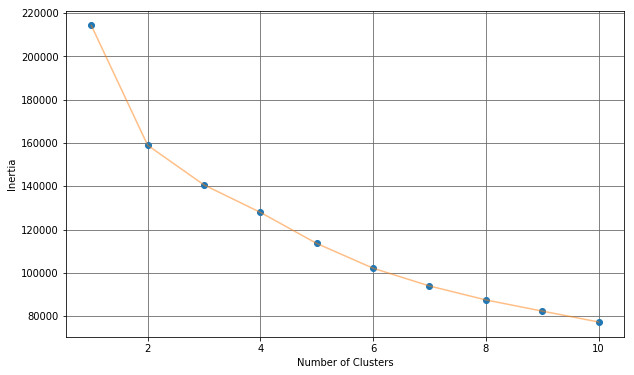

In [20]:
plot_k(data)

In [22]:
def kmeans(df_clustering_std,k):
    features=list(df_clustering_std.columns)
    algorithm = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, 
                            tol=0.0001,  random_state= 111  , algorithm='elkan') )
    X1 = df_clustering_std[features].iloc[: , :].values
    algorithm.fit(X1)
    labels = algorithm.labels_
    centroids = algorithm.cluster_centers_
    labelsncentroids=[labels,centroids]
    return labelsncentroids

In [23]:
k=6
labels=kmeans(data,6)[0]
centroids=kmeans(data,6)[1]

# Centroids table

In [34]:
centroids_table=pd.DataFrame()
centroids_table["profils"]=list(range(0,k))

In [35]:
# data.head()

In [32]:
# list(centroids)[0][2]

In [33]:
# list(centroids)

In [36]:
# ADD Centroids coordinates for each cluster (profile)
a=[]
for i in range(len(list(centroids))):
    a.append(list(centroids)[i][0])
centroids_table["Balance_AMT_score"]=a

b=[]
for i in range(len(list(centroids))):
    b.append(list(centroids)[i][1])
centroids_table["AMOUNT_score"]=b

c=[]
for i in range(len(list(centroids))):
    c.append(list(centroids)[i][2])
centroids_table["month_score"]=c

d=[]
for i in range(len(list(centroids))):
    d.append(list(centroids)[i][3])
centroids_table["day_score"]=d

e=[]
for i in range(len(list(centroids))):
    e.append(list(centroids)[i][4])
centroids_table["dayofweek_score"]=e

f=[]
for i in range(len(list(centroids))):
    f.append(list(centroids)[i][5])
centroids_table["quarter_score"]=f

In [37]:
centroids_table

,profils,Balance_AMT_score,AMOUNT_score,month_score,day_score,dayofweek_score,quarter_score
0,0,-0.179780,0.641456,0.707334,0.106838,-0.719710,0.746894
1,1,-6.317620,0.360474,-0.352705,0.322577,0.063219,-0.409950
2,2,0.705791,-1.190716,0.672821,0.097388,-0.628850,0.672977
3,3,0.007713,0.257038,-1.015287,0.298874,-0.747438,-1.042272
4,4,0.121220,-0.102778,0.785222,-0.156724,0.998646,0.811665
5,5,-0.116623,0.197127,-0.950596,-0.325950,0.863450,-0.982969


In [17]:
list(centroids)[0][0]

-0.031898789746013796

In [38]:
# add cluster number to each point in data and df
data["cluster"]=labels
df["cluster"]=labels

In [39]:
data["Account_No"]=df["Account_No"]

In [40]:
data.head(1)

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No
0,0.729389,-0.340374,-1.792425,-1.69924,-1.359998,-1.541793,3,409000611074'


# Scores computing
## Input: dataset data
##  Output: df with scores and sub-scores variables


### 1) Get cluster (profile) number for each client

In [41]:
clients=list(df["Account_No"].unique())

In [ ]:
# for acc in clients:
#     print(acc)
#     print(data[data["Account_No"]==acc]["cluster"].value_counts())

In [42]:
#add the variable cluster_max to dataset data

data['cluster_max']=0
for acc in clients:
    cond=data["Account_No"]==acc
    data['cluster_max']=data['cluster_max'].mask(cond, data[cond]["cluster"].value_counts().index[0])

In [43]:
data.head(1)

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No,cluster_max
0,0.729389,-0.340374,-1.792425,-1.69924,-1.359998,-1.541793,3,409000611074',0


In [44]:
centroids_table.head(1)

,profils,Balance_AMT_score,AMOUNT_score,month_score,day_score,dayofweek_score,quarter_score
0,0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894


In [45]:
#add coordinates of centroids of cluster_max to dataset data:

data['bal_centroid']=0
data['amount_centroid']=0
data['month_centroid']=0
data['day_centroid']=0
data['dayofweek_centroid']=0
data['quarter_centroid']=0


for i in range(len(centroids_table)):
    
    bal_centroid_0=centroids_table["Balance_AMT_score"][i]
    amount_centroid_0=centroids_table["AMOUNT_score"][i]
    month_centroid_0=centroids_table["month_score"][i]
    day_centroid_0=centroids_table["day_score"][i]
    dayofweek_centroid_0=centroids_table["dayofweek_score"][i]
    quarter_centroid_0=centroids_table["quarter_score"][i]
    
    cond=data["cluster_max"]==i
    
    data['bal_centroid']=data["bal_centroid"].mask(cond,bal_centroid_0)
    data['amount_centroid']=data["amount_centroid"].mask(cond,amount_centroid_0)
    data['month_centroid']=data["month_centroid"].mask(cond,month_centroid_0)
    data['day_centroid']=data["day_centroid"].mask(cond,day_centroid_0)
    data['dayofweek_centroid']=data["dayofweek_centroid"].mask(cond,dayofweek_centroid_0)
    data['quarter_centroid']=data["quarter_centroid"].mask(cond,quarter_centroid_0)


In [46]:
data.head()

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No,cluster_max,bal_centroid,amount_centroid,month_centroid,day_centroid,dayofweek_centroid,quarter_centroid
0,0.729389,-0.340374,-1.792425,-1.699240,-1.359998,-1.541793,3,409000611074',0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894
1,0.728997,0.044054,-1.792425,-1.699240,-1.359998,-1.541793,3,409000611074',0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894
2,0.727931,0.327924,-1.792425,-1.581315,-0.740658,-1.541793,3,409000611074',0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894
3,0.731545,0.674389,-1.792425,-1.463390,-0.121319,-1.541793,5,409000611074',0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894
4,0.729206,0.550817,-1.792425,-1.463390,-0.121319,-1.541793,5,409000611074',0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894


In [34]:
# centroids_table

### 2) Use the centroids of cluster_max to compute distance between points and centroid

In [47]:
data.head(1)

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No,cluster_max,bal_centroid,amount_centroid,month_centroid,day_centroid,dayofweek_centroid,quarter_centroid
0,0.729389,-0.340374,-1.792425,-1.69924,-1.359998,-1.541793,3,409000611074',0,-0.17978,0.641456,0.707334,0.106838,-0.71971,0.746894


In [48]:
data["balance_score"]=np.abs(data["BALANCE_AMT"]- data["bal_centroid"])
data["amount_score"]=np.abs(data["AMOUNT"]- data["amount_centroid"])
data["month_score"]=np.abs(data["month"]- data["month_centroid"])
data["day_score"]=np.abs(data["day"]- data["day_centroid"])
data["dayofweek_score"]=np.abs(data["dayofweek"]- data["dayofweek_centroid"])
data["quarter_score"]=np.abs(data["quarter"]- data["quarter_centroid"])

data["transaction_score"]=data["amount_score"]+data["balance_score"]+data["month_score"]+data["day_score"]+data["dayofweek_score"]+data["quarter_score"]

In [49]:
data.head(1)

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No,cluster_max,bal_centroid,...,day_centroid,dayofweek_centroid,quarter_centroid,balance_score,amount_score,month_score,day_score,dayofweek_score,quarter_score,transaction_score
0,0.729389,-0.340374,-1.792425,-1.69924,-1.359998,-1.541793,3,409000611074',0,-0.17978,...,0.106838,-0.71971,0.746894,0.909169,0.98183,2.49976,1.806078,0.640288,2.288688,9.125813


In [50]:
# Add the variable "is_normal" THAT takes 1 if the transaction is normal according to the clustering (its cluster is the cluster_max ) and takes 0 if not
cond= data["cluster_max"]== data["cluster"]
data["is_normal"]=0
data["is_normal"]= data["is_normal"].mask(cond,1)

In [51]:
data.head()

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No,cluster_max,bal_centroid,...,dayofweek_centroid,quarter_centroid,balance_score,amount_score,month_score,day_score,dayofweek_score,quarter_score,transaction_score,is_normal
0,0.729389,-0.340374,-1.792425,-1.699240,-1.359998,-1.541793,3,409000611074',0,-0.17978,...,-0.71971,0.746894,0.909169,0.981830,2.49976,1.806078,0.640288,2.288688,9.125813,0
1,0.728997,0.044054,-1.792425,-1.699240,-1.359998,-1.541793,3,409000611074',0,-0.17978,...,-0.71971,0.746894,0.908777,0.597402,2.49976,1.806078,0.640288,2.288688,8.740992,0
2,0.727931,0.327924,-1.792425,-1.581315,-0.740658,-1.541793,3,409000611074',0,-0.17978,...,-0.71971,0.746894,0.907711,0.313532,2.49976,1.688153,0.020948,2.288688,7.718792,0
3,0.731545,0.674389,-1.792425,-1.463390,-0.121319,-1.541793,5,409000611074',0,-0.17978,...,-0.71971,0.746894,0.911325,0.032933,2.49976,1.570228,0.598391,2.288688,7.901324,0
4,0.729206,0.550817,-1.792425,-1.463390,-0.121319,-1.541793,5,409000611074',0,-0.17978,...,-0.71971,0.746894,0.908987,0.090639,2.49976,1.570228,0.598391,2.288688,7.956692,0


In [52]:
data[data["Account_No"]==clients[2]] ["is_normal"].value_counts()

1    7
0    5
Name: is_normal, dtype: int64

### 3) Add thresholds

In [53]:
profiles=list(data["cluster_max"].unique())

In [54]:
profiles

[0, 3, 2, 1, 5, 4]

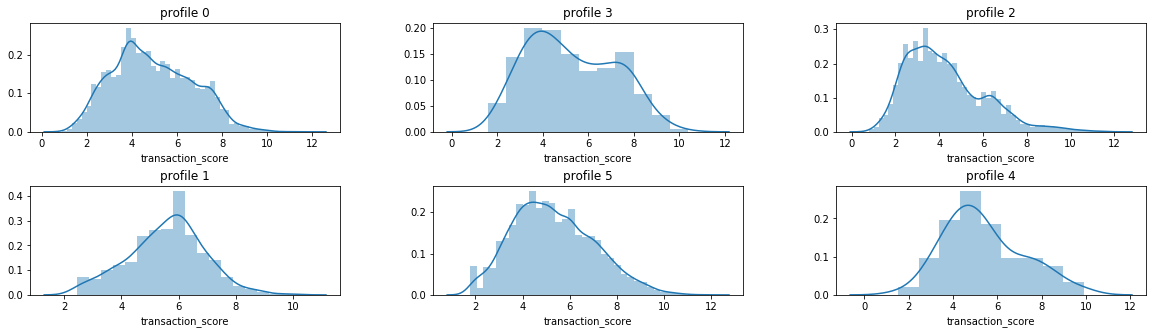

In [55]:
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in profiles:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    sns.distplot(data[data["cluster_max"]==x]["transaction_score"])

    plt.title( "profile " + str(x) )
plt.show()



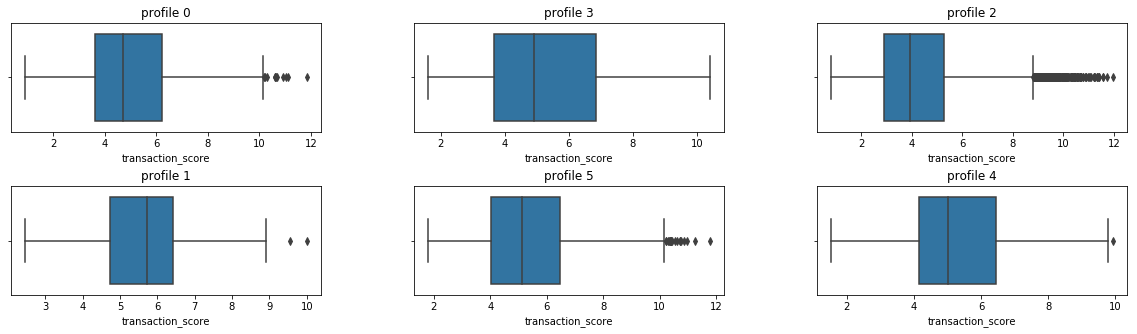

In [56]:
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in profiles:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    sns.boxplot(x=data[data["cluster_max"]==x]["transaction_score"])


    plt.title( "profile " + str(x) )
plt.show()


In [58]:
# Point on the outliers in each profile
# q3=data[data["cluster_max"]==x]["transaction_score"].quantile(0.75)


In [61]:
# data["risk_is_medium"]=0
# q3=data[data["cluster_max"]==x]["transaction_score"].quantile(0.75)
# cond_q=data[data["cluster_max"]==x]["transaction_score"]>q3
# data["risk_is_medium"]=data["risk_is_medium"].mask(cond_q,1)

In [57]:
data["q3_threshold"]=0

for x in profiles:
    cond_q=data["cluster_max"]==x
    q3=data[data["cluster_max"]==x]["transaction_score"].quantile(0.75)
    data["q3_threshold"]=data["q3_threshold"].mask(cond_q,q3)

In [68]:
np.max(data[data["cluster_max"]==x]["transaction_score"])

3.2787214964854896

In [58]:
data["max_threshold"]=0

for x in profiles:
    cond_max=data["cluster_max"]==x
    maxi=np.max(data[data["cluster_max"]==x]["transaction_score"])
    data["max_threshold"]=data["max_threshold"].mask(cond_max,maxi)

In [59]:
data.head(1)

,BALANCE_AMT,AMOUNT,month,day,dayofweek,quarter,cluster,Account_No,cluster_max,bal_centroid,...,balance_score,amount_score,month_score,day_score,dayofweek_score,quarter_score,transaction_score,is_normal,q3_threshold,max_threshold
0,0.729389,-0.340374,-1.792425,-1.69924,-1.359998,-1.541793,3,409000611074',0,-0.17978,...,0.909169,0.98183,2.49976,1.806078,0.640288,2.288688,9.125813,0,6.233871,11.829509


In [60]:
scores=pd.DataFrame()
scores[["Account_No","cluster_max","balance_score","amount_score","month_score","day_score","dayofweek_score","quarter_score",
        "transaction_score","is_normal","q3_threshold","max_threshold"]]=data[["Account_No","cluster_max","balance_score","amount_score",
                                                                               "month_score","day_score","dayofweek_score","quarter_score",
                                                                                                                                         "transaction_score","is_normal","q3_threshold","max_threshold"]]

In [75]:
scores.to_csv ('transactions_scores_1.1.csv', index = None, header=True)


In [68]:
# clients
data["Account_No"][data["cluster_max"]==5].value_counts()

409000362497'    5352
Name: Account_No, dtype: int64

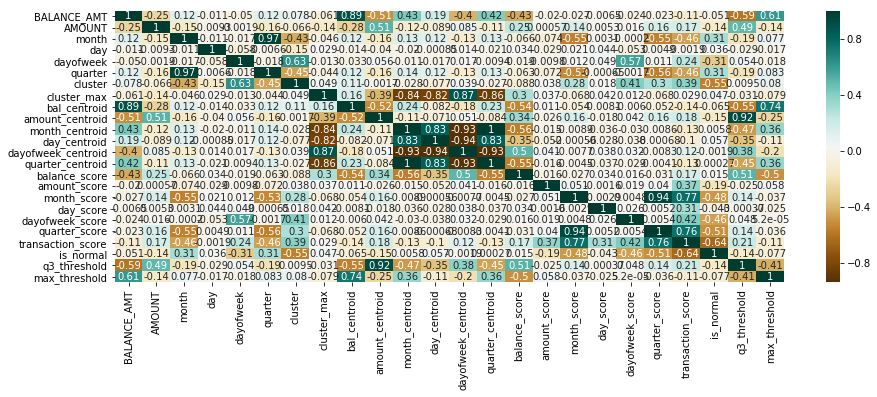

In [69]:
plt.figure(figsize=(15,5))
c= data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [73]:
scores["month_df"]=df["month"]
scores['day_df']=df["day"]

In [74]:
scores.head(1)

,Account_No,cluster_max,balance_score,amount_score,month_score,day_score,dayofweek_score,quarter_score,transaction_score,is_normal,q3_threshold,max_threshold,month_df,day_df
0,409000611074',0,0.909169,0.98183,2.49976,1.806078,0.640288,2.288688,9.125813,0,6.233871,11.829509,1,1
